# Collecting Poem data

In [2]:
corpus = ""
file_names = []
import os

for f in os.listdir():
    if f =="text generation.txt" or f=='Poem generation.ipynb'or f=='.ipynb_checkpoints'or f=='corpus.txt':
        continue
    else :
        file_names.append(f)

        
print(file_names)     

for file_name in file_names:
    with open(file_name, 'r') as f:
         corpus+=f.read()

['A Complaint.txt', 'Character of the Happy Warrior.txt', 'I Wandered Lonely as a Cloud.txt', 'Mutability.txt', 'Nutting.txt', 'The French Revolution as It Appeared to Enthusiasts at Its Commencement.txt', 'The Green Linnet.txt']


In [3]:
print(corpus)

There is a changeâ€”and I am poor;
Your love hath been, nor long ago,
A fountain at my fond heart's door,
Whose only business was to flow;
And flow it did; not taking heed
Of its own bounty, or my need.

What happy moments did I count!
Blest was I then all bliss above!
Now, for that consecrated fount
Of murmuring, sparkling, living love,
What have I? shall I dare to tell?
A comfortless and hidden well.

A well of loveâ€”it may be deepâ€”
I trust it is,â€”and never dry:
What matter? if the waters sleep
In silence and obscurity.
â€”Such change, and at the very door
Of my fond heart, hath made me poor.Who is the happy Warrior? Who is he
That every man in arms should wish to be?
â€”It is the generous Spirit, who, when brought
Among the tasks of real life, hath wrought
Upon the plan that pleased his boyish thought:
Whose high endeavours are an inward light
That makes the path before him always bright;
Who, with a natural instinct to discern
What knowledge can perform, is diligent to learn;


In [4]:
with open("corpus.txt",'w') as f:
    f.write(corpus)
    
with open("corpus.txt",'r+') as f:
    for line in f:
        line= line.rstrip()
        f.write(line)
        
with open("corpus.txt",'r') as f:
    for line in f:
        print(line)


There is a changeâ€”and I am poor;

Your love hath been, nor long ago,

A fountain at my fond heart's door,

Whose only business was to flow;

And flow it did; not taking heed

Of its own bounty, or my need.



What happy moments did I count!

Blest was I then all bliss above!

Now, for that consecrated fount

Of murmuring, sparkling, living love,

What have I? shall I dare to tell?

A comfortless and hidden well.



A well of loveâ€”it may be deepâ€”

I trust it is,â€”and never dry:

What matter? if the waters sleep

In silence and obscurity.

â€”Such change, and at the very door

Of my fond heart, hath made me poor.Who is the happy Warrior? Who is he

That every man in arms should wish to be?

â€”It is the generous Spirit, who, when brought

Among the tasks of real life, hath wrought

Upon the plan that pleased his boyish thought:

Whose high endeavours are an inward light

That makes the path before him always bright;

Who, with a natural instinct to discern

What knowledge can perf

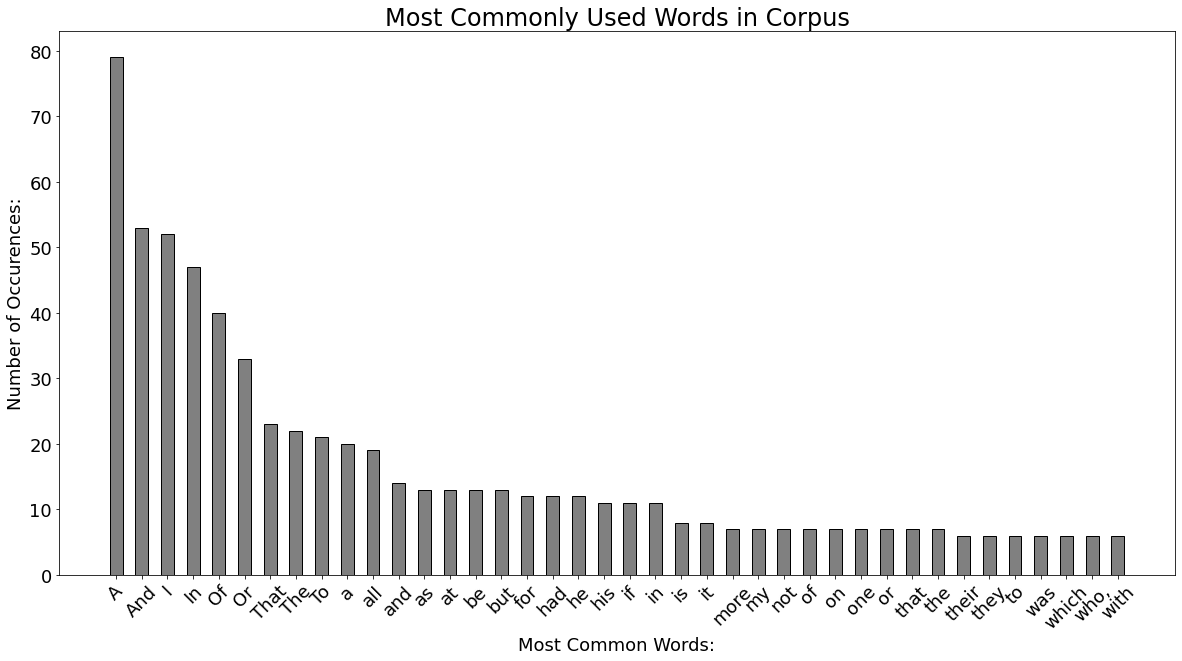

In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
def plotWordFrequency(file_name):
    f = open(file_name,'r')
    words = [x for y in [l.split() for l in f.readlines()] for x in y]
    data = sorted([(w, words.count(w)) for w in set(words)], key = lambda x:x[1], reverse=True)[:40] 
    most_words = [x[0] for x in data]
    times_used = [int(x[1]) for x in data]
    plt.figure(figsize=(20,10))
    plt.bar(x=sorted(most_words), height=times_used, color = 'grey', edgecolor = 'black',  width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(rotation=0, fontsize=18)
    plt.xlabel('Most Common Words:', fontsize=18)
    plt.ylabel('Number of Occurences:', fontsize=18)
    plt.title('Most Commonly Used Words in Corpus' , fontsize=24)
    plt.show()
    f.close()
    
    
plotWordFrequency("corpus.txt")    

# Using Markov Chain

In [7]:
def generateTable(data,k=4):
    
    T = {}
    for i in range(len(data)-k):
        X = data[i:i+k]
        Y = data[i+k]
        #print("X  %s and Y %s  "%(X,Y))
        
        if T.get(X) is None:
            T[X] = {}
            T[X][Y] = 1
        else:
            if T[X].get(Y) is None:
                T[X][Y] = 1
            else:
                T[X][Y] += 1
    
    return T

In [8]:
def convertFreqIntoProb(T):     
    for kx in T.keys():
        s = float(sum(T[kx].values()))
        for k in T[kx].keys():
            T[kx][k] = T[kx][k]/s
                
    return T

In [9]:
#text_path = "english_speech_2.txt"

def load_text(filename):
    with open(filename,encoding='utf8') as f:
        return f.read().lower().strip()
    
text = load_text("corpus.txt")



def trainMarkovChain(text,k=4):
    
    T = generateTable(text,k)
    T = convertFreqIntoProb(T)
    
    return T

model = trainMarkovChain(text)

In [10]:
import numpy as np



def sample_next(ctx,T,k):
    ctx = ctx[-k:]
    if T.get(ctx) is None:
        return " "
    possible_Chars = list(T[ctx].keys())
    possible_values = list(T[ctx].values())
    
    #print(possible_Chars)
    #print(possible_values)
    
    return np.random.choice(possible_Chars,p=possible_values)



def generateText(starting_sent,k=4,maxLen=1000):
    
    sentence = starting_sent
    ctx = starting_sent[-k:]
    
    for ix in range(maxLen):
        next_prediction = sample_next(ctx,model,k)
        sentence += next_prediction
        ctx = sentence[-k:]
    return sentence

text = generateText("dear",k=4,maxLen=2000)
print(text)

dear whose man in the hazels of many one
when one frugal dame—
motley accoutrement, of the enchanger can herse, than need with a soundation; who, those poor.who comforth brightest guester-breath bright
that pleasure find,
in vacant exulting, line
and the milky way,
nor loves by objects, and erect, keeps the hath much change, also, more; more above there,
tossing with crime,
not at have i? shape or for act in heart wild,
and twinkle only day
(i speak of the plast,
from well one of a bowers sleep
in wait
for heaves betray;
and such i lie in gently games of love,
when my found me, schemers on stood
upon to their milky water-breaks do melt pleasant air,
or ministerday, i count!
blest:
hail to be.i wanded,
by exposed to high endeavoured long in him must wake
to virgin self-knowledge called out)
one of gentle hand
on himself-surpast:
whose to green and the flutter outward living for else retired;
and fed to tendered lofty
did wear
his song a sound, under him pers ther,
in which, when all blo

# Using LSTM

In [2]:
!python -m pip install tensorflow

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

Using legacy 'setup.py install' for clang, since package 'wheel' is not installed.
Using legacy 'setup.py install' for termcolor, since package 'wheel' is not installed.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.0
    Uninstalling typing-extensions-3.10.0.0:
      Successfully uninstalled typing-extensions-3.10.0.0
    Running setup.py install for termcolor: started
    Running setup.py install for termcolor: finished with status 'done'
    Running setup.py install for clang: started
    Running setup.py install for clang: finished with status 'done'


In [20]:
tokenizer = Tokenizer()
data = open('corpus.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
print(input_sequences)
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

[[36, 10], [36, 10, 6], [36, 10, 6, 124], [36, 10, 6, 124, 8], [36, 10, 6, 124, 8, 125], [36, 10, 6, 124, 8, 125, 83], [244, 54], [244, 54, 55], [244, 54, 55, 84], [244, 54, 55, 84, 47], [244, 54, 55, 84, 47, 126], [244, 54, 55, 84, 47, 126, 245], [6, 246], [6, 246, 19], [6, 246, 19, 14], [6, 246, 19, 14, 127], [6, 246, 19, 14, 127, 128], [6, 246, 19, 14, 127, 128, 129], [31, 247], [31, 247, 248], [31, 247, 248, 32], [31, 247, 248, 32, 4], [31, 247, 248, 32, 4, 130], [2, 130], [2, 130, 33], [2, 130, 33, 41], [2, 130, 33, 41, 15], [2, 130, 33, 41, 15, 249], [2, 130, 33, 41, 15, 249, 250], [3, 56], [3, 56, 57], [3, 56, 57, 251], [3, 56, 57, 251, 12], [3, 56, 57, 251, 12, 14], [3, 56, 57, 251, 12, 14, 85], [28, 58], [28, 58, 252], [28, 58, 252, 41], [28, 58, 252, 41, 8], [28, 58, 252, 41, 8, 253], [59, 32], [59, 32, 8], [59, 32, 8, 37], [59, 32, 8, 37, 23], [59, 32, 8, 37, 23, 86], [59, 32, 8, 37, 23, 86, 87], [88, 20], [88, 20, 7], [88, 20, 7, 254], [88, 20, 7, 254, 255], [3, 131], [3, 1

In [21]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           88400     
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 15, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 442)               44642     
_________________________________________________________________
dense_1 (Dense)              (None, 884)               391612    
Total params: 986,254
Trainable params: 986,254
Non-trainable params: 0
________________________________________________

In [22]:

history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
55/55 [==============================] - 8s 40ms/step - loss: 7.4230 - accuracy: 0.0346
Epoch 2/100
55/55 [==============================] - 3s 61ms/step - loss: 6.4560 - accuracy: 0.0409
Epoch 3/100
55/55 [==============================] - 2s 42ms/step - loss: 6.1645 - accuracy: 0.0461
Epoch 4/100
55/55 [==============================] - 2s 45ms/step - loss: 5.9188 - accuracy: 0.0421
Epoch 5/100
55/55 [==============================] - 2s 43ms/step - loss: 5.7916 - accuracy: 0.0374
Epoch 6/100
55/55 [==============================] - 3s 54ms/step - loss: 5.6971 - accuracy: 0.0421
Epoch 7/100
55/55 [==============================] - 3s 48ms/step - loss: 5.5885 - accuracy: 0.0449
Epoch 8/100
55/55 [==============================] - 4s 81ms/step - loss: 5.5189 - accuracy: 0.0484
Epoch 9/100
55/55 [==============================] - 2s 41ms/step - loss: 5.4636 - accuracy: 0.0593
Epoch 10/100
55/55 [==============================] - 4s 68ms/step - loss: 5.4200 - accuracy: 0.0639

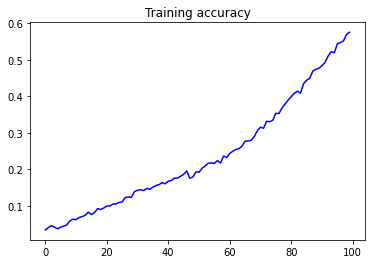

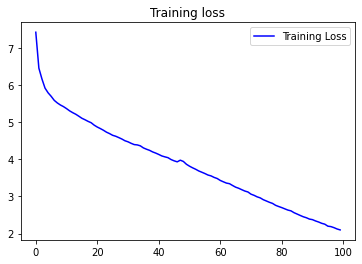

In [23]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [39]:
seed_text = "Who is the happy Warrior? Who is he"
next_words = 1000


for count in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted=np.argmax(predicted,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    if count%10==0:
        seed_text+="\n"
    else:
        seed_text += " " + output_word
    
print(seed_text)

Who is the happy Warrior? Who is he
 had means and sullied man â€” lifted high and
 could who not not not not not but that
 must own dry who did were smile on stocks
 of the heart to those who after long who
 seems a day all forward from exercise a sense
 of pain when i beheld beneath these fruit tree
 boughs that beneath these fruit oh pleasant exercise of
 hope and joy in his trust and to the
 bowers of those who lifted day our mood could
 who is the shady trees and saw the sense
 of herself to motions and to these value must
 low of gentle greet not is his boyish thought
 of friends gain stand unseen stand dissolution climb in
 the heart in gushes that exulting strain stand unseen
 stand fast round me scattered like a changeâ€”and i
 am poor ods oh pleasant exercise of hope and
 joy in his trust and to the soul bough
 and plain to sleep own ending without or any
 its kindliness on the heart on gushes which that
 beneath these fruit seat when i within my sound
 do spirit who seems a 